In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("mushroom_cleaned.csv")
X = dataset.drop(columns=['class']).values
y = dataset['class'].values
dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
dataset.drop_duplicates(inplace=True)

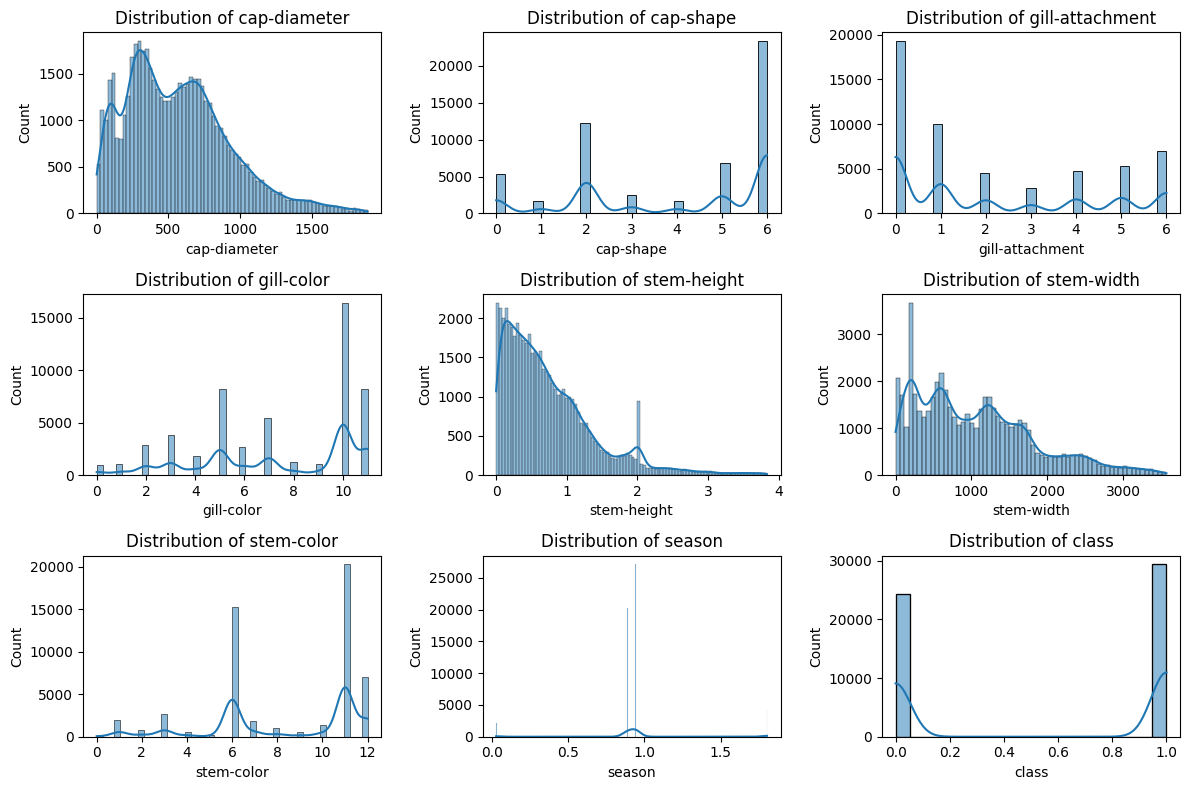

In [6]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(dataset.columns):
    if dataset[col].dtype != 'object':
        plt.subplot(3, 3, i + 1)
        sns.histplot(dataset[col], kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

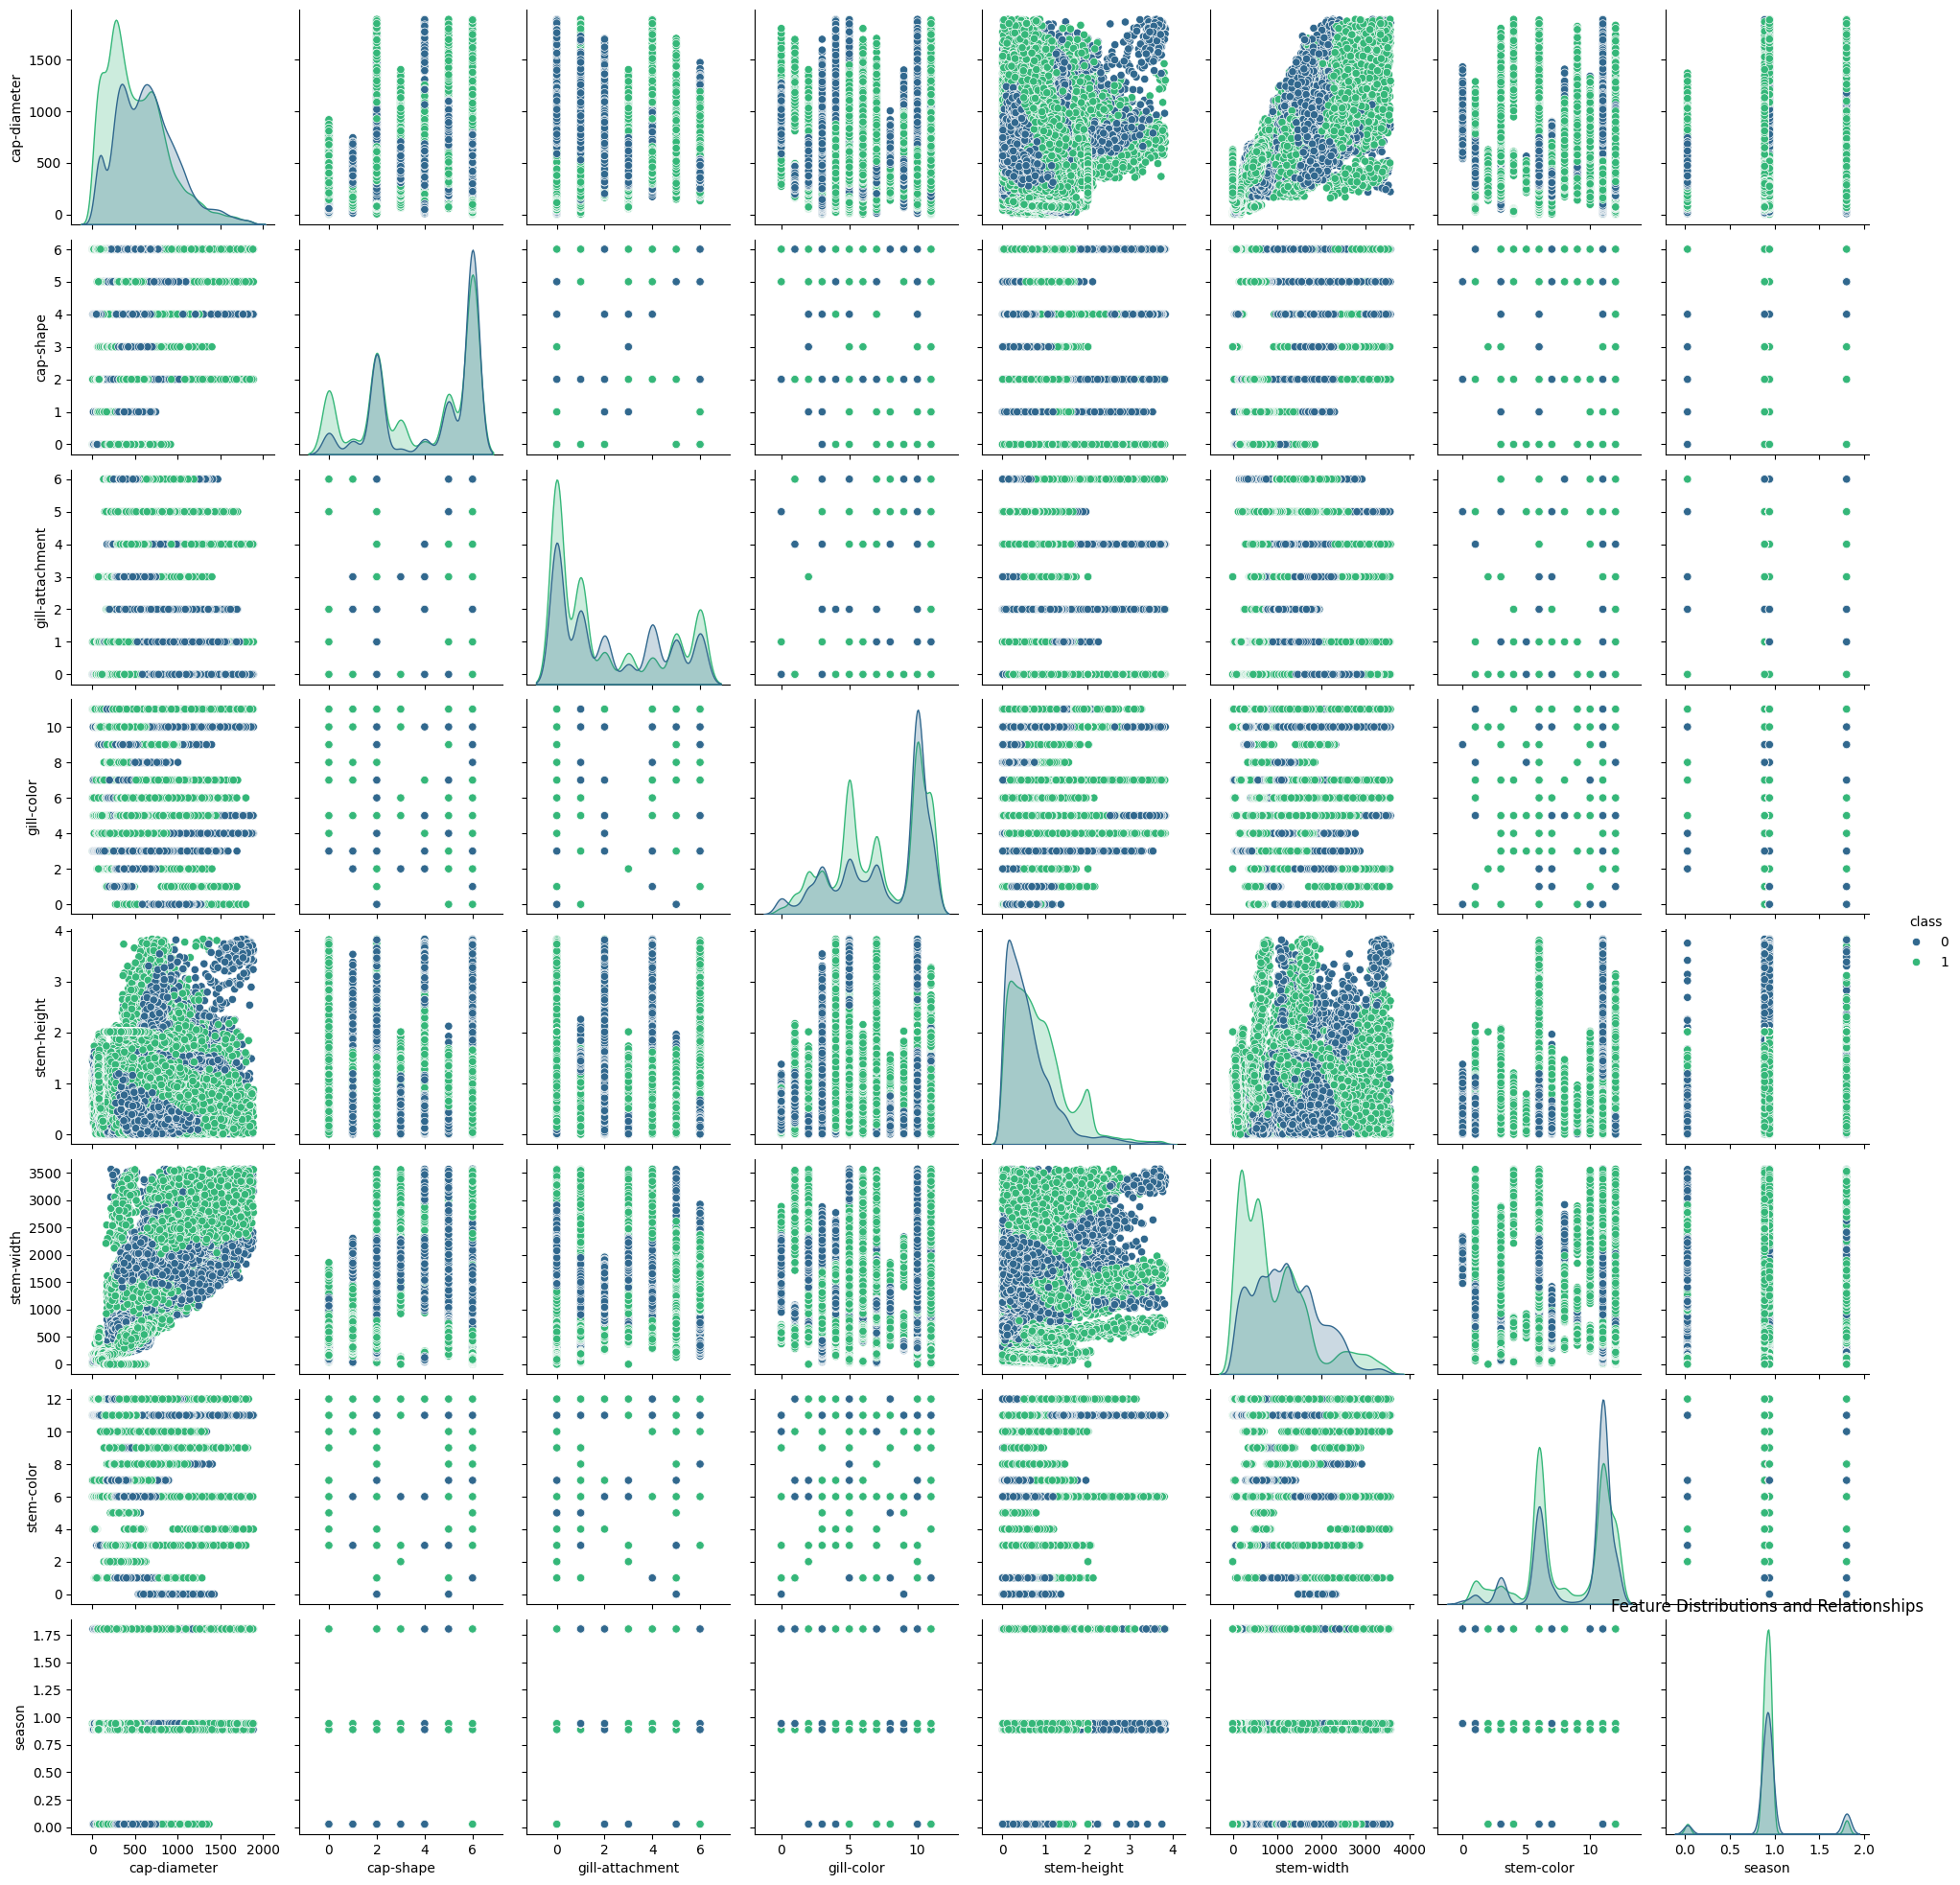

In [14]:
sns.pairplot(dataset, hue='class', palette='viridis')
plt.title('Feature Distributions and Relationships')
plt.show()

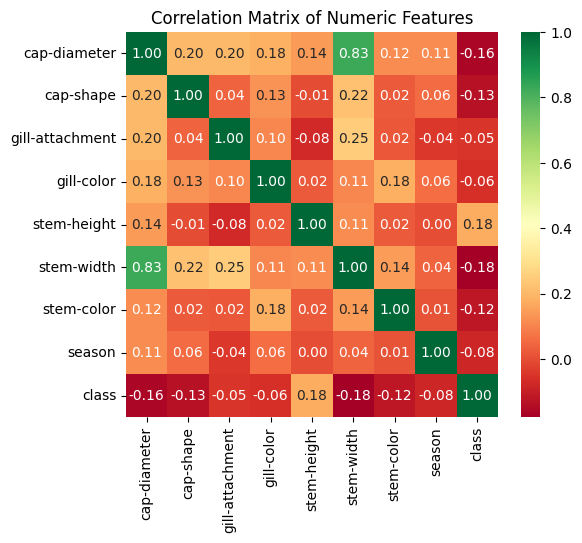

In [8]:
numeric_cols = dataset.select_dtypes(include=np.number).columns
correlation_matrix = dataset[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    h = sigmoid(z)
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    h = sigmoid(z)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient

def gradient_descent(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])
    cost_history = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

In [10]:
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

learning_rate = 0.01
iterations = 5000
weights, cost_history = gradient_descent(X_train, y_train, learning_rate, iterations)

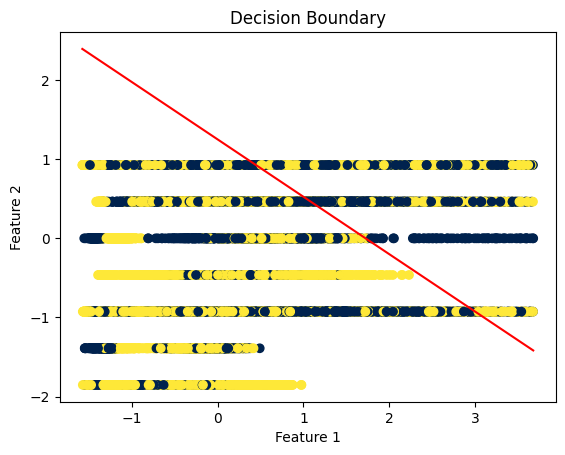

In [11]:
def plot_decision_boundary(X, y, weights):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='cividis')
    x_boundary = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_boundary = -(weights[0] + weights[1] * x_boundary) / weights[2]
    plt.plot(x_boundary, y_boundary, color='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, weights)

In [12]:
z_test = np.dot(X_test, weights)
y_pred = sigmoid(z_test) >= 0.5

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 score: {f1*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 63.70%
Precision: 65.19%
Recall: 71.87%
F1 score: 68.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



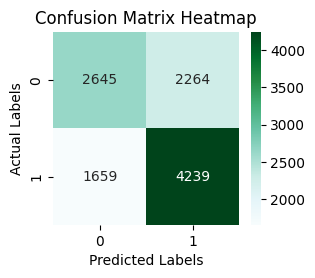

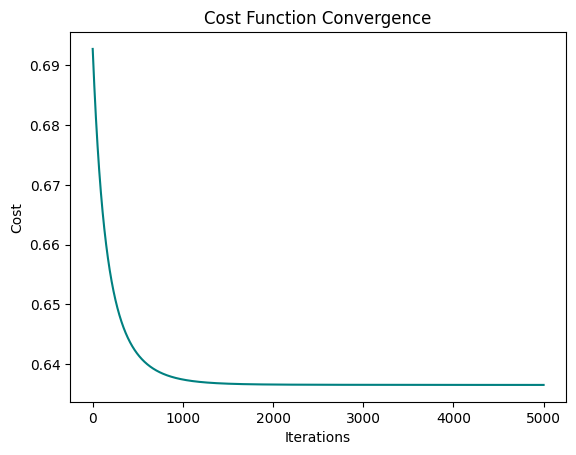

In [13]:
labels = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

sns.lineplot(x=range(iterations), y=cost_history, color='teal')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()